<a href="https://colab.research.google.com/github/JazmineOrtiz/Simulaci-n-I/blob/main/AgujaDeBufon_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Experimento de la Aguja de Buffon

El experimento de la aguja de Buffon es un problema clásico de probabilidad geométrica, diseñado por el científico francés Georges-Louis Leclerc, Conde de Buffon en el siglo XVIII. Este experimento tiene una curiosa aplicación para estimar el valor de π (pi).

1. Superficie con Líneas Paralelas: Se utiliza una superficie plana sobre la cual se han dibujado líneas paralelas equidistantes entre sí. La distancia entre las líneas es constante y se denota como dd.

2. Aguja: Se utiliza una aguja que tiene una longitud ll, donde l≤dl.

3. Lanzamiento de la Aguja: La aguja se lanza al azar sobre la superficie con las líneas paralelas.

4. Observación: Se observa si la aguja cruza alguna de las líneas paralelas trazadas en la superficie.

$\text{Variables del Experimento}$\
$L$: Longitud de la aguja.\
$\theta$: Ángulo.\
$X$: Distancia.\
$D$: Distancia entre las líneas paralelas.

$\text{Distribución de las Variables}$

$X$ se distribuye entre 0 y \(D/2\).\
$\theta$ se distribuye entre 0 y $\pi$.\

$\text{Cálculo de la Probabilidad de Cruce}$

La proyección de la aguja en la dirección perpendicular es:$
[(\frac{L}{2}) \sin(\theta)
]$

##La condición para que la aguja cruce una línea es:
$[
\left(\frac{L}{2}\right) \sin(\theta) \geq X
]$

$\text{Derivación de \(\pi\)}$

Queremos encontrar la probabilidad $p$ de que la aguja cruce una línea:\
$
p = \frac{1}{D/2} \frac{1}{\pi} \int_{0}^{\pi} \int_{0}^{\left(\frac{L}{2}\right) \sin(\theta)} dx \, d\theta
$\

$
p = \frac{2}{D \pi} \int_{0}^{\pi} \left(\frac{L}{2}\right) \sin(\theta) \, d\theta
$


$
p = \frac{L}{D \pi} \left[-\cos(\theta)\right]_0^{\pi} = \frac{2L}{D \pi}
$

Despejamos $\pi:$\
$
\pi \approx \frac{2L n}{D c}
$

donde:\
p=c/n\
n: Número total de lanzamientos.\
c: Número de cruces.

Esta formulación permite estimar $\pi$ basándose en los resultados experimentales del número de cruces de la aguja con las líneas paralelas.

In [3]:
#importamos las librerías
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#codigo para estimar pi en base a la probabilidad de cruce

def cruce(n):
    cruces = 0
    lista=[]
    for i in range(n):
      theta = 1/2*np.pi*rnd.uniform(0,1)            #Generamos ángulos aleatorios para las agujas
      x = rnd.uniform(0, 1 / 2)       #Generamos posiciones aleatorias del centro de la aguja respecto a la línea más cercana
      if x <= (1 / 2) * np.sin(theta):    #Calculamos si la aguja cruza alguna línea
        cruces +=1
      prob=cruces/((i+1)*2) #probabilidad de 2/pi
      lista.append(prob*(np.pi)**2)

    return lista,prob

#Codigo para generar el experimento

lista, prob =cruce(1000)
media=np.mean(lista) #Calcula la media
print(media)
desve=np.std(lista) #Calcula la desviación estándar
print(desve)

3.375315533867392
0.11282684090973319


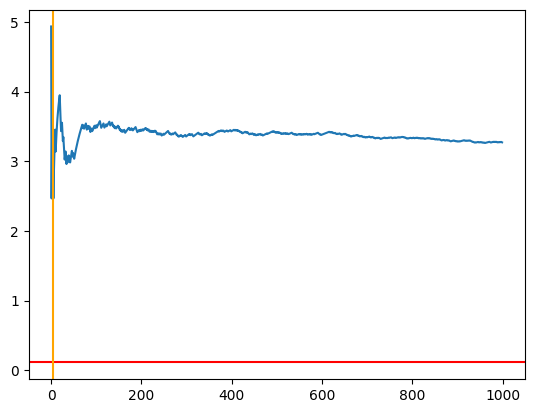

In [8]:

#Código para grafica la lista

plt.plot(lista)
plt.axhline(desve,color="red")
plt.axvline(media,color="orange")
plt.show()

Para modificar la función y convertirla en una corrida de la simulación: lista-->lista[-1] y fijarnos N=600,ya que se encuentra en el estado estacionario

In [14]:
#generamos la simulacion del experimento
def simulación (n):
   r=[]
   for i in range(n):
      R_1,R_2=cruce (600)
      r.append(R_1[-1])
   return r

(array([  7.,  20.,  65., 111., 193., 222., 214., 108.,  40.,  20.]),
 array([2.83751127, 2.89508396, 2.95265665, 3.01022934, 3.06780203,
        3.12537473, 3.18294742, 3.24052011, 3.2980928 , 3.3556655 ,
        3.41323819]),
 <BarContainer object of 10 artists>)

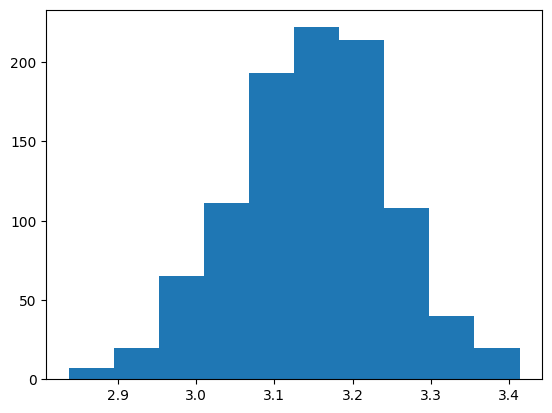

In [16]:

#Generamos el histograma
S=simulación (1000)
plt.hist(S)

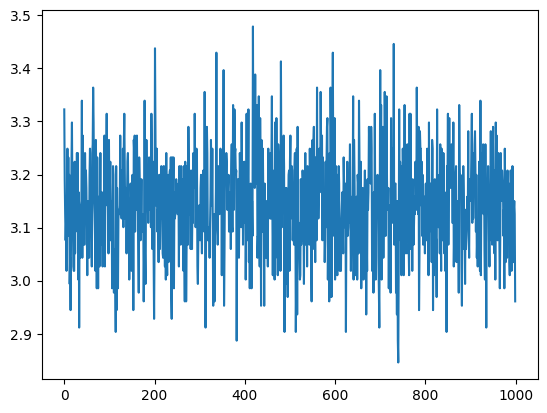

In [ ]:
plt.plot(S)

In [17]:
#Para calcular el promedio
np.average(S)

3.1448096230114415

Usaremos la desigualdad de chebyshev para calcular N:
$P(|Z_N−π|≥∈)≤\frac{V(Z_N)}{∈^2 }$

In [19]:
#Estimador para N
P=abs(media-np.pi)
print(P)
N_final=((np.pi)**2)*(desve**2)/(2*P*(desve**2))
print("N: ", round(N_final))

0.23372288027759902
N:  21
